# [PACKUS] 유저별 총 주문금액, Active User 수, 1인당 주문 금액 (2)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams

def set_korea_font():
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    rcParams.update({'font.size': 11})
    rcParams['axes.unicode_minus'] = False  
set_korea_font()
%matplotlib inline

In [4]:
data = pd.read_csv('modeldata.csv')

data['날짜'] = pd.to_datetime(data['날짜'])
data = data.set_index('날짜')

In [5]:
data['active user'] = data['누적 가입자수'] - data['누적 이탈자수']

In [6]:
group = data.groupby(pd.Grouper(freq="M"))
monthly = group.sum()

In [7]:
monthly['1인 당 주문금액'] = monthly['총 주문금액'] / monthly['active user']

### '회원가입일 - 최종주문일'로 active user파악

In [8]:
a = monthly[monthly.index.year>2016][['총 주문금액']].iloc[:-3,:]

In [9]:
b = data[(data.index.year>2016)&(data.index.day==30)][['active user']]

In [10]:
b['1인 당 주문금액']  = a.values / b.values

In [11]:
b.head()

,active user,1인 당 주문금액
날짜,,
2017-01-30,7.0,27171.428571
2017-03-30,29.0,75571.551724
2017-04-30,51.0,88744.019608
2017-05-30,85.0,48139.647059
2017-06-30,113.0,109853.805310


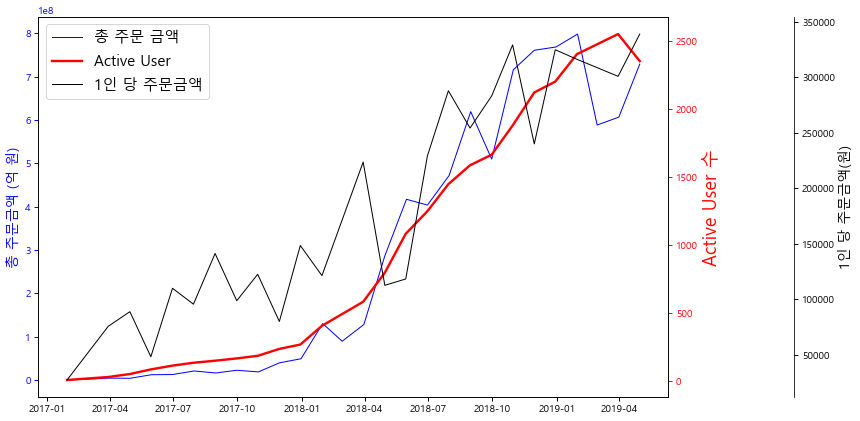

In [12]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

data1 = monthly[monthly.index.year>2016][['총 주문금액']].iloc[:-4,]
data2 = b[['active user']]['active user'].iloc[:-4,]
data3 = b[['1인 당 주문금액']].iloc[:-4,]

fig, host = plt.subplots(figsize=(14,7))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot(data1, color='blue',label='총 주문 금액',lw=1)
p2, = par1.plot(data2, color='red',label='Active User',lw=2.4)
p3, = par2.plot(data3, color='black',label='1인 당 주문금액',lw=1)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

#host.set_xlabel("기간", fontsize=14)
host.set_ylabel("총 주문금액 (억 원)",fontsize=14)
par1.set_ylabel("Active User 수", fontsize=18)
par2.set_ylabel("1인 당 주문금액(원)", fontsize=14)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines], prop={'size': 15})
#plt.axvline(pd.Timestamp('2019-05-01'),color='black', lw=2)
#plt.title('PACKUS의 주문금액 및 이용자 현황')
plt.xticks(fontsize=15)

plt.show()

